In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
import warnings
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

warnings.filterwarnings(action='ignore')

class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"

In [ ]:
# read dataset
def read_banking_data(filepath) -> pd.DataFrame:
    data = pd.read_csv(filepath, delimiter=';')\
        .rename(columns={'y':'subscribed'})

    data = data[data['age'] != 'age']

    numeric = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
    for att in numeric:
        data[att] = pd.to_numeric(data[att])

    return data


df = read_banking_data(filepath='./train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
# msno.bar(df, figsize=(9,5), color=Colors.Teal)

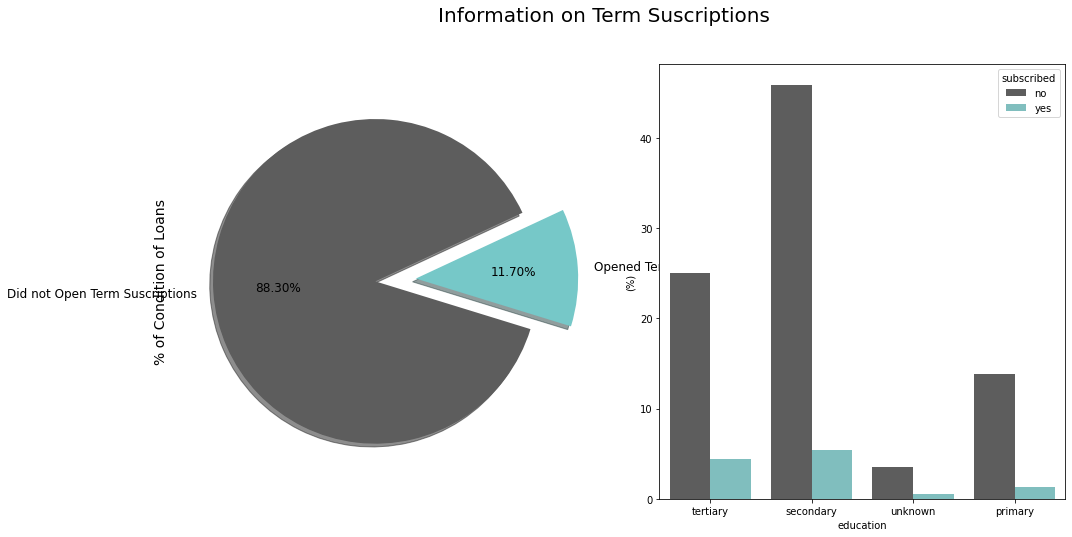

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#5d5d5d", "#76c8c8"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#5d5d5d", "#76c8c8"]

sns.barplot(x="education", y="balance", hue="subscribed", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

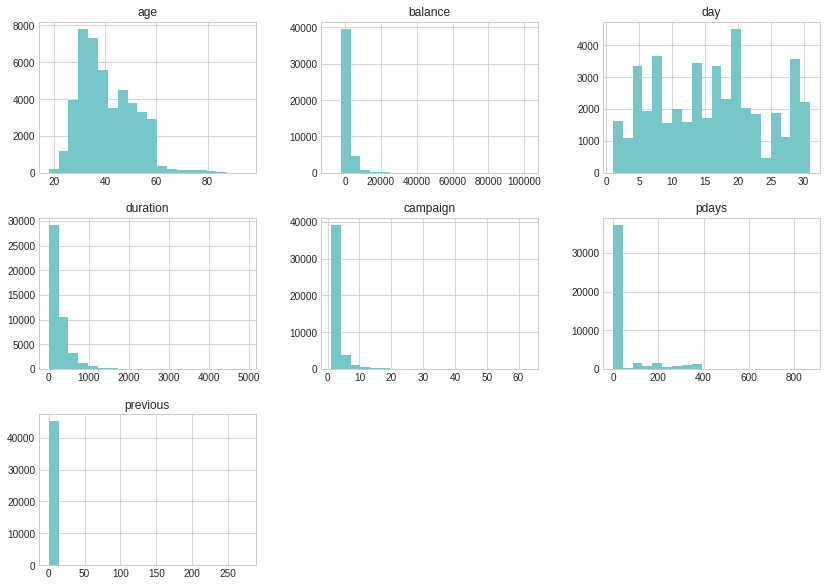

In [ ]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#76c8c8')
plt.show()

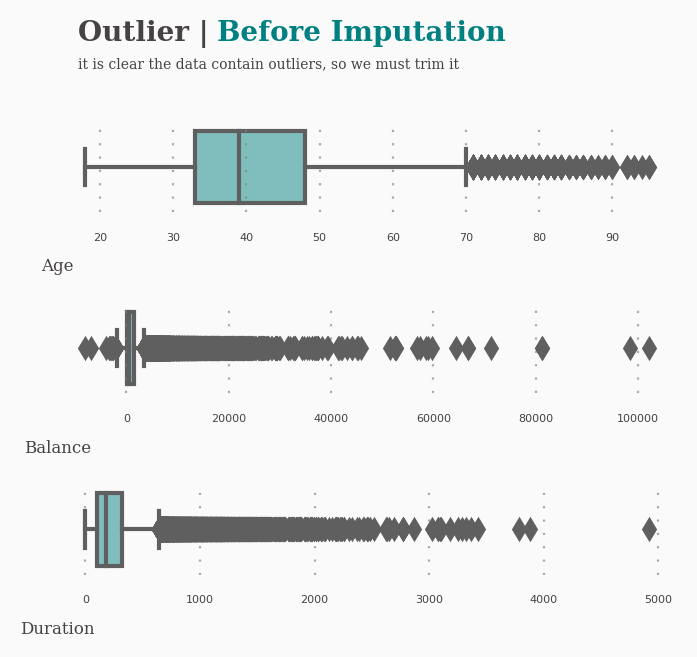

In [ ]:
# setting up canvas
fig = plt.figure(figsize=(4, 3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# aalignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot 1 - 3 -> before imputing
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df, x=col, ax=locals()["axis" + str(ax)], color=Colors.Aquamarine)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(
    17,
    -1.4,
    "Outlier |",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
axis0.text(
    36,
    -1.4,
    "Before Imputation",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.Teal,
)
axis0.text(
    17,
    -1.1,
    "it is clear the data contain outliers, so we must trim it",
    fontweight="normal",
    fontfamily="serif",
    fontsize=5,
    color=Colors.DarkGray,
)

fig.show()

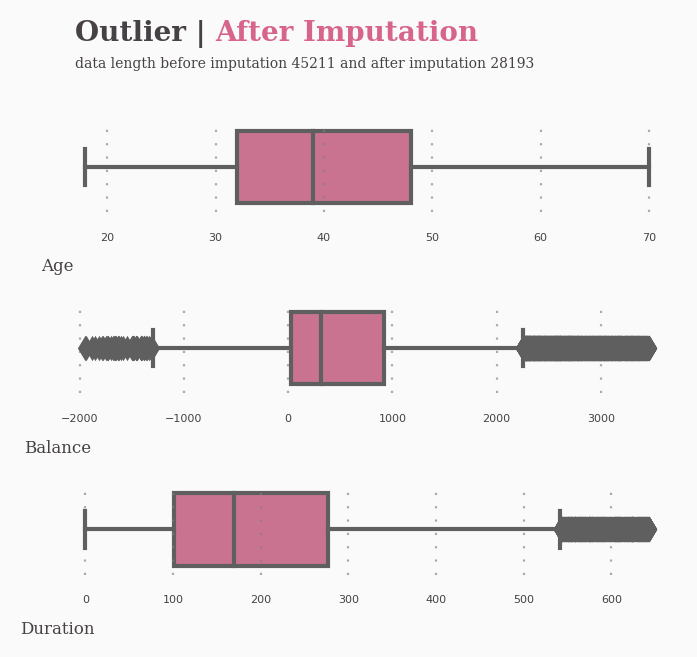

In [ ]:
# subset outliers function
def handling_outlier() -> pd.DataFrame:
    cols = [
        "age",
        "balance",
        "duration",
        "day",
        "duration",
        "campaign",
        "pdays",
        "previous",
    ]
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df2


df2 = handling_outlier()

# setting up canvas
fig = plt.figure(figsize=(4, 3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# aalignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot 1 - 3 -> before imputing
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df2, x=col, ax=locals()["axis" + str(ax)], color=Colors.HotPink)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(17,-1.4,"Outlier |",fontweight="bold",fontfamily="serif",fontsize=10,color=Colors.DarkGray,)
axis0.text(30,-1.4,"After Imputation",fontweight="bold",fontfamily="serif",fontsize=10,color=Colors.HotPink,)
axis0.text(17,-1.1,f"data length before imputation {len(df)} and after imputation {len(df2)}",fontweight="normal",fontfamily="serif",fontsize=5,color=Colors.DarkGray,)

fig.show()

In [ ]:
# Data Prep

def data_prep(*var_name, dataframe) -> pd.DataFrame:
    data = dataframe.groupby([*var_name]).size().to_frame(name = 'count').reset_index()
    data['percentage'] = data['count'].apply(lambda x: x / sum(data['count']) * 100)

    return data

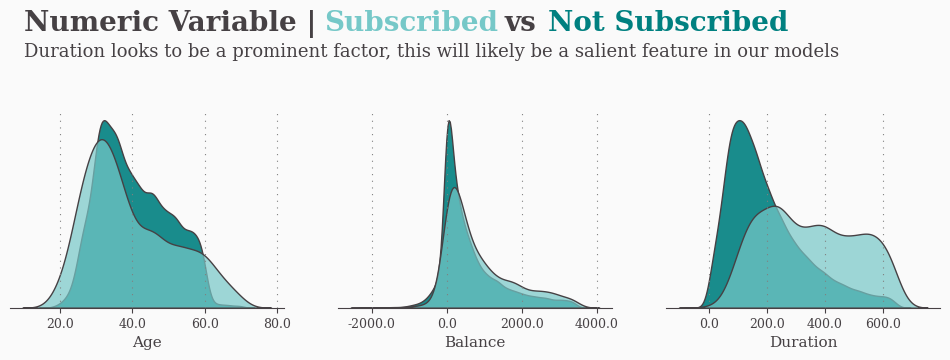

In [ ]:
# data
no_subs = df2.query("subscribed == 'no'")
yes_subs = df2.query("subscribed == 'yes'")

fig = plt.figure(figsize=(12,12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,3)



for ax,col in enumerate(range(0, 3)):
    locals()["ax"+str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax"+str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax"+str(ax)].tick_params(axis='y', left=False)
    locals()["ax"+str(ax)].tick_params(axis='x', color=Colors.DarkGray)
    locals()["ax"+str(ax)].get_yaxis().set_visible(False)
    locals()["ax"+str(ax)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    for s in ["top","right","left"]:
        locals()["ax"+str(ax)].spines[s].set_visible(False)
        locals()["ax"+str(ax)].spines['bottom'].set_color(Colors.DarkGray)

col = ['age', 'balance', 'duration']
for i,col in enumerate(col):
    sns.kdeplot(no_subs[col], ax=locals()['ax'+str(i)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
    sns.kdeplot(yes_subs[col], ax=locals()['ax'+str(i)], shade=True, color=Colors.Aquamarine, alpha=0.7, ec=Colors.DarkGray)
    locals()['ax'+str(i)].set_xlabel(col.title(), fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(i)].set_xticklabels(labels=locals()['ax'+str(i)].get_xticks().tolist(), fontfamily='serif', fontsize=9, color=Colors.DarkGray)

# text
ax0.text(10,0.065, 'Numeric Variable |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(93,0.065,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(143,0.065,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(155,0.065,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

ax0.text(10,0.059, 'Duration looks to be a prominent factor, this will likely be a salient feature in our models',fontfamily="serif",fontsize=13,fontweight="normal",color=Colors.DarkGray)

fig.show()


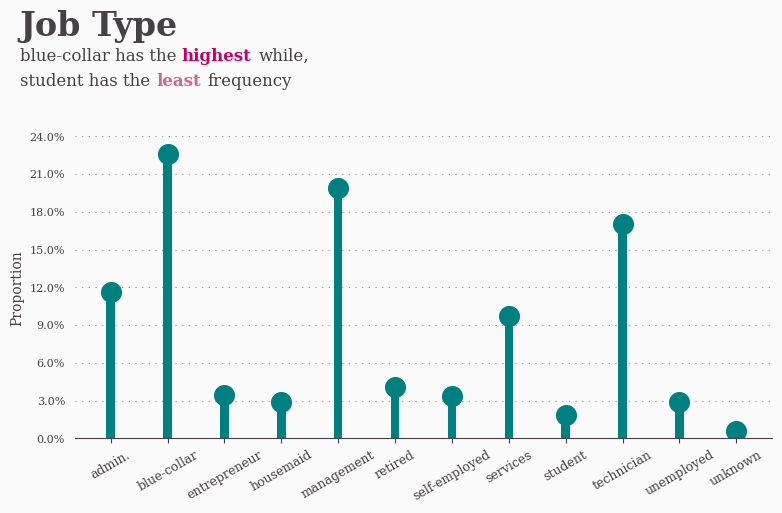

In [ ]:
# data
job = data_prep('job', dataframe = df2 )

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="y", left=False, color=Colors.DarkGray)
ax0.tick_params(axis="x", color=Colors.DarkGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.65,
)

for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)

ax0.spines["bottom"].set_color(Colors.DarkGray)

# plotting
ax0.bar(job.job, height=job.percentage, zorder=3, color=Colors.Teal, width=0.15)
ax0.scatter(job.job, job.percentage, s=200, color=Colors.Teal)

# plot settings
ax0.set_xticklabels(
    labels=list(job.job),
    rotation=30,
    fontfamily="serif",
    fontsize=9,
    color=Colors.DarkGray,
)
ax0.set_yticklabels(
    ax0.get_yticks(), fontfamily="serif", fontsize=8, color=Colors.DarkGray
)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(3))

ax0.set_ylabel(
    "Proportion",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray
)

ax0.yaxis.set_ticks(np.arange(0, 27, 3))


# text
ax0.text(-1.6,32,"Job Type",fontsize=24,fontfamily="serif",fontweight="bold",color=Colors.DarkGray,)

ax0.text(-1.6,30,"blue-collar has the",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)
ax0.text(1.25,30,"highest",fontsize=12,fontfamily="serif",fontweight="bold",color=Colors.DeepPink,)
ax0.text(2.6,30,"while,",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)

ax0.text(-1.6,28,"student has the",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)
ax0.text(0.8,28,"least",fontsize=12,fontfamily="serif",fontweight="bold",color=Colors.HotPink,)
ax0.text(1.7,28,"frequency",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)

fig.show()


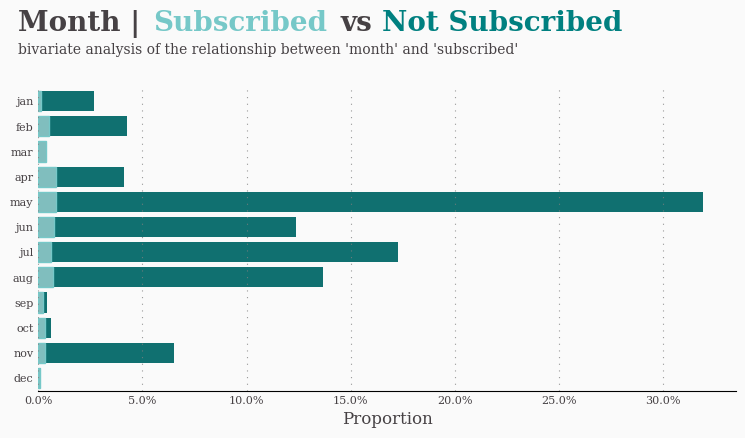

In [ ]:
  # data
lst = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

month = data_prep('month', 'subscribed', dataframe = df2)
no_subs = month.query("subscribed == 'no'").set_index('month').loc[lst].reset_index()
yes_subs = month.query("subscribed == 'yes'").set_index('month').loc[lst].reset_index()

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)

# plot
sns.barplot(x="percentage", y="month", data=no_subs, color=Colors.Teal, ax=ax0, zorder=0)
sns.barplot(x="percentage", y="month", data=yes_subs, color=Colors.Aquamarine, ax=ax0, ec=Colors.Aquamarine)

# plot setting
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(5))
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_ylabel("")

# text
ax0.text(-1, -2.8, 'Month |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(5.5, -2.8, 'Subscribed',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
ax0.text(14.5, -2.8, 'vs',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(16.5, -2.8, 'Not Subscribed',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)

ax0.text(-1, -1.9, "bivariate analysis of the relationship between 'month' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)

fig.show()

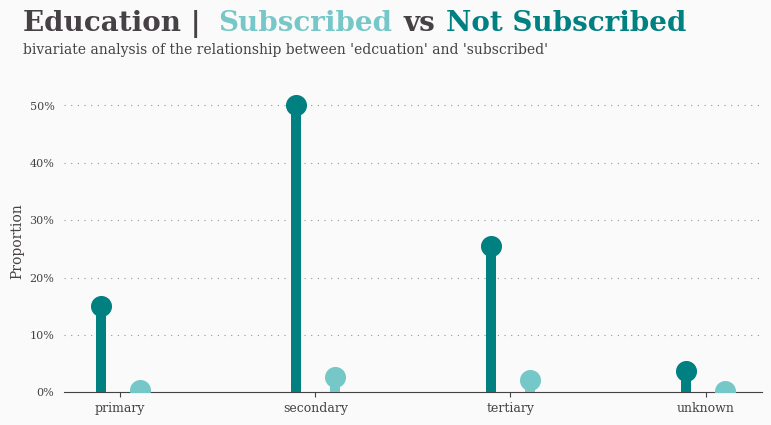

In [ ]:
# data
contact = data_prep('education', 'subscribed', dataframe = df2)
positive = contact.query("subscribed == 'yes'")
negative = contact.query("subscribed == 'no'")

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="y", left=False, color=Colors.DarkGray)
ax0.tick_params(axis="x", color=Colors.DarkGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.65,
)

for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)

ax0.spines["bottom"].set_color(Colors.DarkGray)

# plotting
ax0.bar(negative.education, height=negative["percentage"], zorder=3, color=Colors.Teal, width=0.05)
ax0.scatter(negative.education, negative["percentage"], zorder=3,s=200, color=Colors.Teal)
ax0.bar(np.arange(len(positive.education))+0.2, height=positive["percentage"], zorder=3, color=Colors.Aquamarine, width=0.05)
ax0.scatter(np.arange(len(positive.education))+0.2, positive["percentage"], zorder=3,s=200, color=Colors.Aquamarine)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(positive.education))+0.2 / 2)
ax0.set_xticklabels(list(positive.education),rotation=0)

# plot settings
# plot settings
ax0.set_xticklabels(
    labels=list(positive.education),
    rotation=0,
    fontfamily="serif",
    fontsize=9,
    color=Colors.DarkGray,
)
ax0.set_yticklabels(
    ax0.get_yticks(), fontfamily="serif", fontsize=8, color=Colors.DarkGray
)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(3))

ax0.set_ylabel(
    "Proportion",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray
)

ax0.yaxis.set_ticks(np.arange(0, 60, 10))
ax0.text(-0.4, 63, 'Education |', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.DarkGray)
ax0.text(0.6, 63, 'Subscribed', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.Aquamarine)
ax0.text(1.55, 63, 'vs', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.DarkGray)
ax0.text(1.77, 63, 'Not Subscribed', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.Teal)
ax0.text(-0.4,59,"bivariate analysis of the relationship between 'edcuation' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)



fig.show()


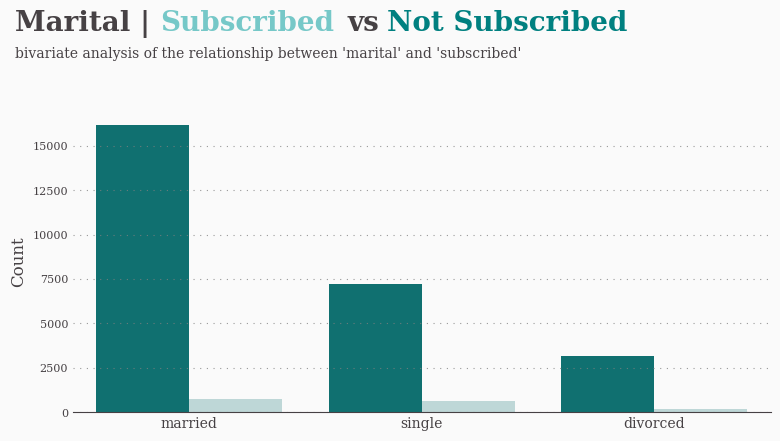

In [ ]:
# plot
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
sns.countplot(
    data=df2,
    x="marital",
    hue="subscribed",
    palette=[Colors.Teal, Colors.LightCyan],
    ax=ax0,
)

# plot setting
ax0.get_legend().remove()
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2500))
ax0.set_xticklabels(
    labels=list(df2["marital"].unique()),
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("")
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(-0.75,21500,"Marital |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(-0.125,21500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(0.68,21500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.85,21500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)
ax0.text(-0.75,20000,"bivariate analysis of the relationship between 'marital' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)

fig.show()


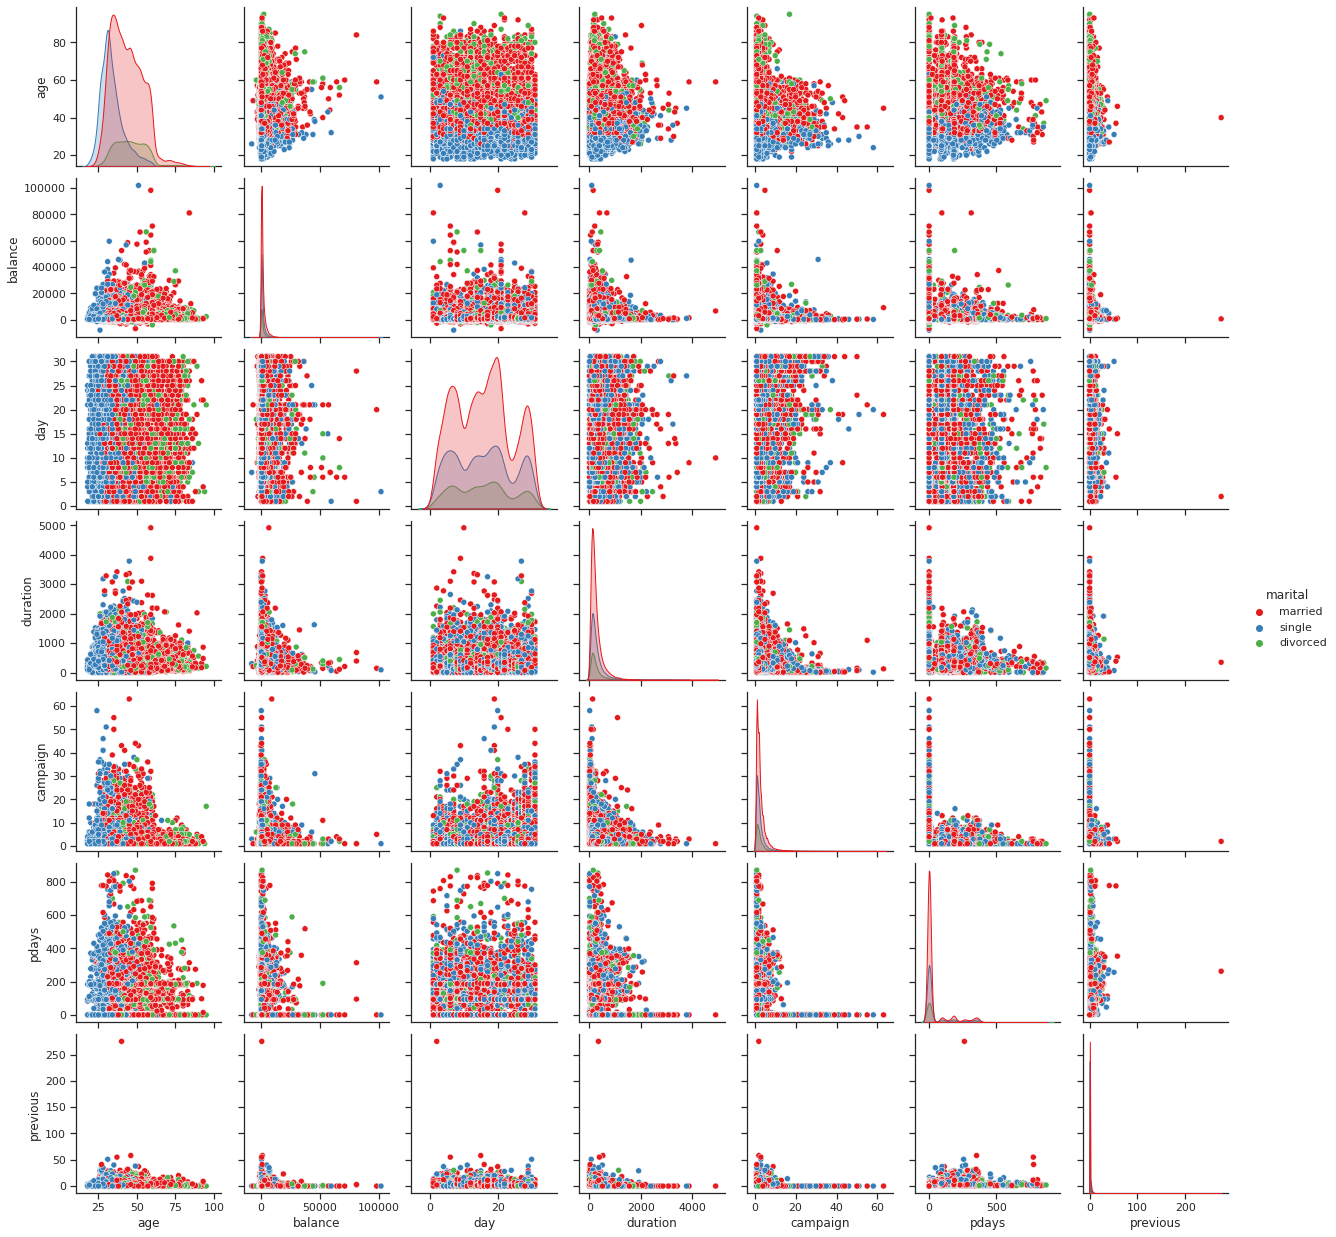

In [ ]:


import seaborn as sns
sns.set(style="ticks")

# sns.pairplot(df, hue="marital/education", palette="Set1")
sns.pairplot(df, hue="marital", palette="Set1")
plt.show()



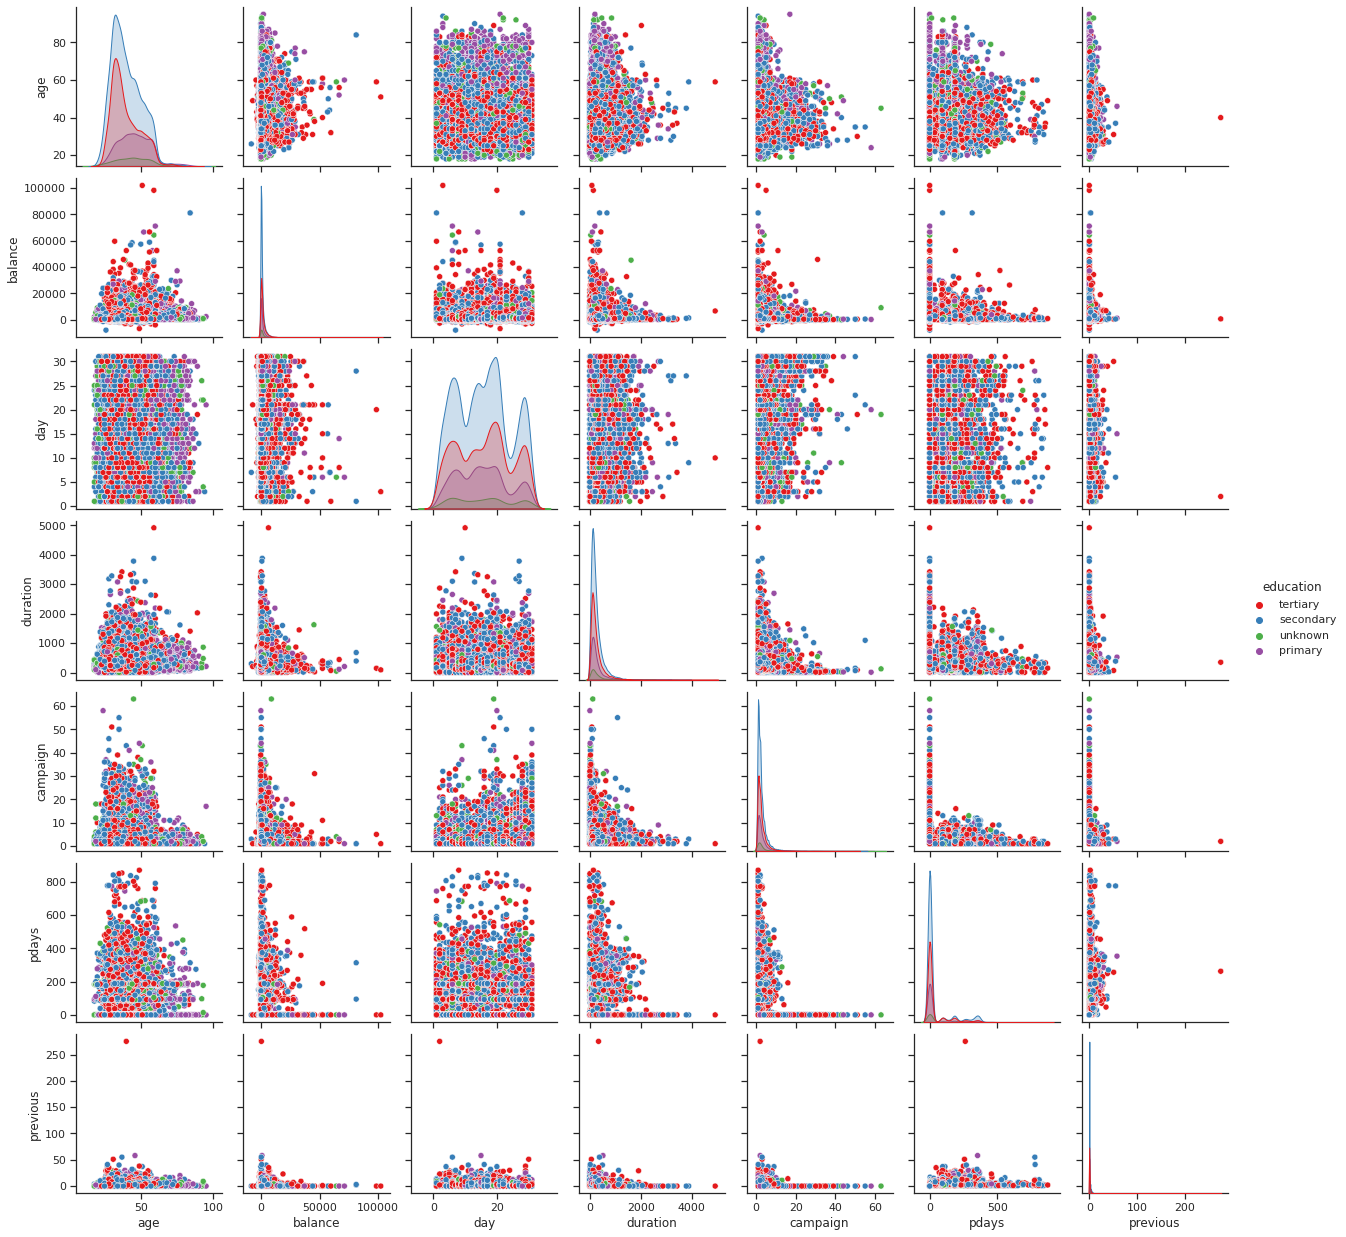

In [ ]:
sns.pairplot(df, hue="education", palette="Set1")
plt.show()

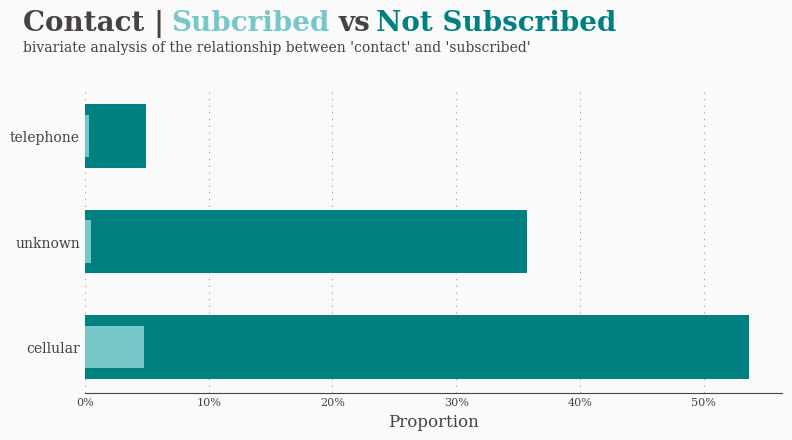

In [ ]:
# data
data = data_prep('contact', 'subscribed', dataframe = df2)
positive = data.query("subscribed == 'yes'").sort_values(by='percentage', ascending=False)
negative = data.query("subscribed == 'no'").sort_values(by='percentage', ascending=False)

# plot
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)


# plot
ax0.barh(
    negative.contact,
    negative.percentage,
    color=Colors.Teal,
    zorder=3,
    height=0.6
)
ax0.barh(
    positive.contact,
    positive.percentage,
    color=Colors.Aquamarine,
    zorder=3,
    height=0.4
)

# plot setting
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=10)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(-5,3,"Contact |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(7,3,"Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
ax0.text(20.5,3,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(23.5,3,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)
ax0.text(-5,2.8,"bivariate analysis of the relationship between 'contact' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray)

fig.show()

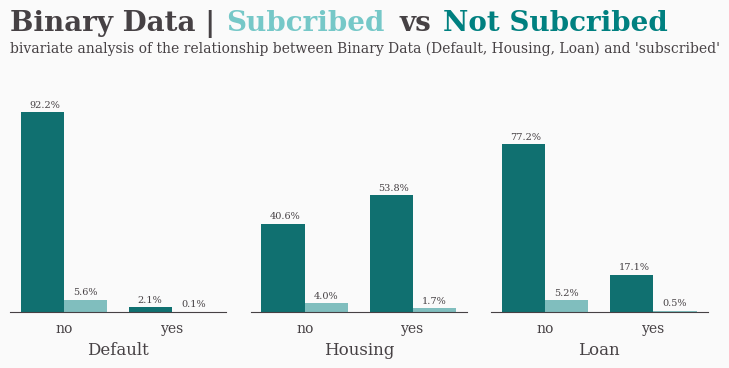

In [ ]:
# data default
default = data_prep('default', 'subscribed', dataframe = df2)

# data housing
housing = data_prep('housing', 'subscribed', dataframe = df2)

# data loan
loan = data_prep('loan', 'subscribed', dataframe = df2)

# setup canvas
fig = plt.figure(figsize=(9, 6), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 6, wspace=0.25)

# aalignment
left = 0
right = 2
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0:2, left:right])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="y",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="x", bottom=False)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()['axis'+str(ax)].get_yaxis().set_visible(False)
    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis" + str(ax)].spines["bottom"].set_color(Colors.DarkGray)

    left += 2
    right += 2

# plot
for ax, data in zip(range(3), [default, housing, loan]):
    sns.barplot(data=data, x=data.columns[0], y='percentage', hue='subscribed',ax=locals()['axis'+str(ax)], palette=[Colors.Teal, Colors.Aquamarine])
    locals()['axis'+str(ax)].yaxis.set_major_formatter(mtick.PercentFormatter())
    locals()['axis'+str(ax)].yaxis.set_major_locator(mtick.MultipleLocator(10))
    locals()['axis'+str(ax)].yaxis.set_ticks(np.arange(0, 110, 10))
    locals()['axis'+str(ax)].get_legend().remove()
    locals()['axis'+str(ax)].set_xticklabels(labels=['no', 'yes'],fontfamily="serif",fontsize=10,color=Colors.DarkGray,)
    locals()['axis'+str(ax)].set_xlabel(data.columns[0].title(),fontfamily="serif",fontsize=12,color=Colors.DarkGray,)
    for p in locals()['axis'+str(ax)].patches:
        locals()['axis'+str(ax)].annotate(f'{round(p.get_height(), 1)}%', (p.get_x()+0.08, p.get_height()+2.5), fontsize=7,fontweight='normal', fontfamily='serif', color=Colors.DarkGray)


# text
axis0.text(-0.5,130,"Binary Data |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
axis0.text(-0.5,120,"bivariate analysis of the relationship between Binary Data (Default, Housing, Loan) and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray)
axis0.text(1.5,130,"Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
axis0.text(3.5,130,"Not Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)
axis0.text(3.1,130,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)

fig.show()


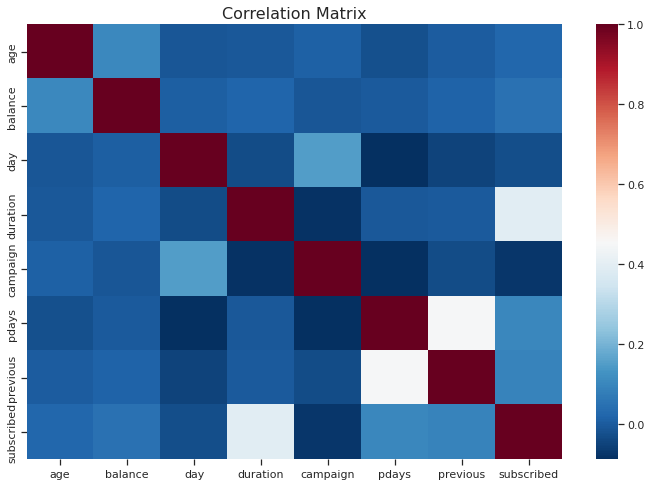

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['subscribed'] = LabelEncoder().fit_transform(df['subscribed'])



# Separate both dataframes into
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 38.9 MB/s eta 0:00:00


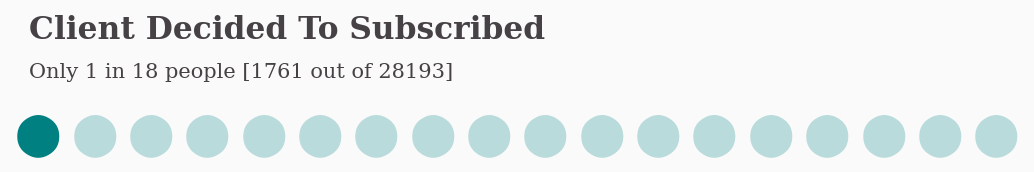

In [ ]:
!pip install pywaffle
from pywaffle import Waffle

# data
subs = data_prep('subscribed', dataframe = df2)
subs = subs.sort_index()
# print(subs)

# plot
fig = plt.figure(
    figsize=(7, 2),
    dpi=150,
    facecolor=Colors.LightGray,
    FigureClass=Waffle,
    rows=1,
    values=[1, 17],
    colors=[Colors.Teal, Colors.LightCyan],
    characters="⬤",
    font_size=20,
    vertical=True,
)

# text
fig.text(
    0.035,
    0.78,
    "Client Decided To Subscribed",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
    color=Colors.DarkGray,
)
fig.text(
    0.035,
    0.65,
    f"Only 1 in 18 people [1761 out of {len(df2)}]",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)

fig.show()

In [ ]:
col_names = ['job', 'education', 'contact']

for col in col_names:
    print(f'Before | {col} = {df2[col].unique()}')
    df2[col].replace(['unknown'], df2[col].mode(), inplace=True)
    print(f'After | {col} = {df2[col].unique()}\n')

Before | job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
After | job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Before | education = ['tertiary' 'secondary' 'unknown' 'primary']
After | education = ['tertiary' 'secondary' 'primary']

Before | contact = ['unknown' 'cellular' 'telephone']
After | contact = ['cellular' 'telephone']



In [ ]:
df2.drop(columns = ['month', 'previous', 'day', 'pdays', 'poutcome'], inplace = True)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,subscribed
0,58,management,married,tertiary,no,2143,yes,no,cellular,261,1,no
1,44,technician,single,secondary,no,29,yes,no,cellular,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,92,1,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,198,1,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

class Encoding:
    def __init__(self, data: pd.DataFrame):
        self.dataframe = data
        self.data = None

    def encoding_binary_data(self, binary_data: list):
        for col in binary_data:
            if col == 'contact':
                self.dataframe[col] = self.dataframe[col].map({
                    'telephone': 1,
                    'cellular' : 0
                })

            else:
                self.dataframe[col] = self.dataframe[col].map({
                    'yes': 1,
                    'no' : 0
                })

        self.data = self.dataframe
        return self

    def encoding_nonbinary_data(self, var: list):
        for col in var:
            self.dataframe[col] = LabelEncoder().fit_transform(self.dataframe[col])

        self.data = self.dataframe
        return self

    def fetch(self) -> pd.DataFrame:
        return self.data

encoding = Encoding(data = df2)\
    .encoding_binary_data(['default', 'housing', 'loan', 'contact'])\
    .encoding_nonbinary_data(['job', 'marital', 'education','subscribed'])

In [ ]:
df2 = encoding.fetch()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,subscribed
0,58,4,1,2,0,2143,1,0,0,261,1,0
1,44,9,2,1,0,29,1,0,0,151,1,0
2,33,2,1,1,0,2,1,1,0,76,1,0
3,47,1,1,1,0,1506,1,0,0,92,1,0
4,33,1,2,1,0,1,0,0,0,198,1,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

x = df2.drop('subscribed', axis = 1)
y = df2.loc[:, 'subscribed']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state = 1)
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)

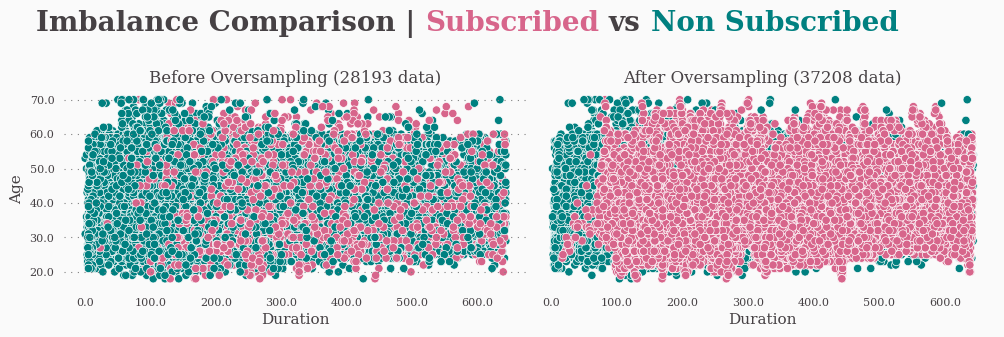

In [ ]:
#data
# after smote
after_smote_df2 = pd.concat([X_train_oversampling, y_train_oversampling], axis=1)

fig = plt.figure(figsize=(12,12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,2, wspace=0.01)


for ax,col in enumerate(range(0, 2)):
    locals()["ax"+str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax"+str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax"+str(ax)].tick_params(axis='y', left=False)
    locals()["ax"+str(ax)].tick_params(axis='x', bottom=False, color=Colors.DarkGray)
    locals()["ax"+str(ax)].get_yaxis().set_visible(True)
    locals()["ax"+str(ax)].grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    for s in ["top","right","left",'bottom']:
        locals()["ax"+str(ax)].spines[s].set_visible(False)

color_palette = [Colors.Teal, Colors.HotPink]

sns.scatterplot(data=df2, x='duration', y='age', hue='subscribed', ax=ax0, palette=color_palette).set_title(f"Before Oversampling ({len(df2.subscribed)} data)", fontsize=12, fontfamily='serif', color=Colors.DarkGray)
sns.scatterplot(data=after_smote_df2, x='duration', y='age', hue='subscribed', ax=ax1, palette=color_palette).set_title(f"After Oversampling ({len(after_smote_df2.subscribed)} data)", fontsize=12, fontfamily='serif', color=Colors.DarkGray)

for ax in range(2):
    locals()['ax'+str(ax)].get_legend().remove()
    locals()['ax'+str(ax)].set_xlabel("Duration", fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_ylabel("Age", fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_xticklabels(labels=ax0.get_xticks().tolist(), fontfamily='serif', fontsize=8, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_yticklabels(labels=ax0.get_yticks().tolist(), fontfamily='serif', fontsize=8, color=Colors.DarkGray)

ax1.get_yaxis().set_visible(False)

ax0.text(-75,90, 'Imbalance Comparison |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(520,90,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.HotPink,)
ax0.text(800,90,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(865,90,"Non Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_params = {"penalty": ['l1', 'l2'],
            "C":[0.001,0.01,0.1,1,10,100]}

gcv_logreg = GridSearchCV(LogisticRegression(random_state=1),
                   param_grid = logreg_params,
                   cv = 10,
                   scoring = 'f1')


logreg_gcv = gcv_logreg.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {logreg_gcv.best_params_}')
print(f'Best Score: {logreg_gcv.best_score_}')

Best Parameter: {'C': 100, 'penalty': 'l2'}
Best Score: 0.8445635969224202


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

logreg_pred = logreg_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, logreg_pred))
print('Accuracy Score: ',accuracy_score(y_test,logreg_pred))
print(f'F1 Score: {f1_score(y_test,logreg_pred)}')

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7990
           1       0.17      0.64      0.27       468

    accuracy                           0.81      8458
   macro avg       0.57      0.73      0.58      8458
weighted avg       0.93      0.81      0.86      8458

Accuracy Score:  0.8118940647907307
F1 Score: 0.2731841023298309


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_params = {"var_smoothing": np.logspace(0, -9, num = 100)}

gcv_nb = GridSearchCV(GaussianNB(),
                   param_grid = nb_params,
                   cv = 10,
                   scoring = 'f1')


nb_gcv = gcv_nb.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {nb_gcv.best_params_}')
print(f'Best Score: {nb_gcv.best_score_}')


Best Parameter: {'var_smoothing': 2.310129700083158e-07}
Best Score: 0.8363270340818583


In [ ]:
nb_pred = nb_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, nb_pred))
print('Accuracy Score: ',accuracy_score(y_test,nb_pred))
print(f'F1 Score: {f1_score(y_test,nb_pred)}\n')

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7990
           1       0.13      0.74      0.22       468

    accuracy                           0.70      8458
   macro avg       0.55      0.72      0.52      8458
weighted avg       0.93      0.70      0.78      8458

Accuracy Score:  0.7034759990541499
F1 Score: 0.21575984990619135



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {"criterion": ['gini', 'entropy'],
            "max_depth": np.arange(3, 15)}

gcv_dt = GridSearchCV(DecisionTreeClassifier(random_state=1),
                   param_grid = dt_params,
                   cv = 10,
                   scoring = 'f1')


dt_gcv = gcv_dt.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {dt_gcv.best_params_}')
print(f'Best Score: {dt_gcv.best_score_}')

Best Parameter: {'criterion': 'gini', 'max_depth': 14}
Best Score: 0.8972894563786203


In [ ]:
dt_pred = dt_gcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_pred))
print('Accuracy Score: ',accuracy_score(y_test,dt_pred))
print(f'F1 Score: {f1_score(y_test,dt_pred)}\n')

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7990
           1       0.15      0.44      0.22       468

    accuracy                           0.83      8458
   macro avg       0.55      0.64      0.56      8458
weighted avg       0.92      0.83      0.87      8458

Accuracy Score:  0.8285646724994088
F1 Score: 0.21959095801937564



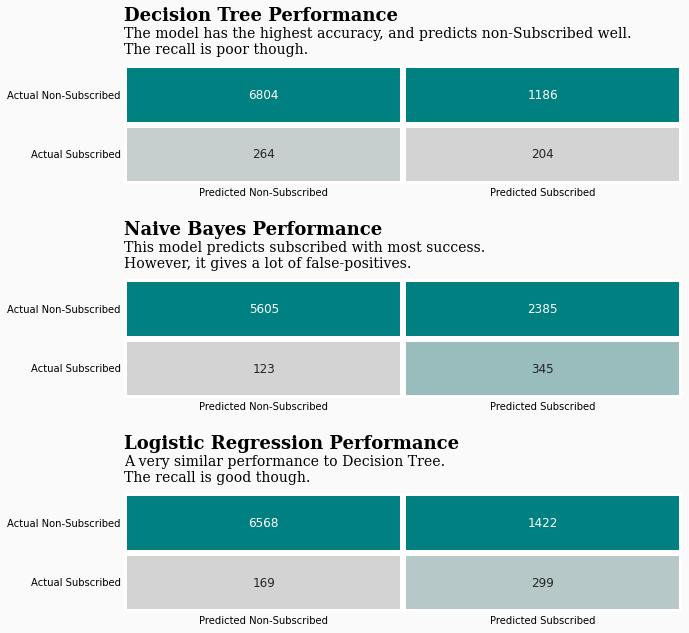

In [ ]:
import matplotlib

colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10,14), facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(4, 2, wspace=0.1, hspace=0.8)

for ax in range(3):
    locals()['ax'+str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['ax'+str(ax)].set_facecolor(Colors.LightGray)
    locals()['ax'+str(ax)].tick_params(axis=u'both', which=u'both',length=0)


# decision tree
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# naive bayes
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# logistiic regression
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})


# test
ax0.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.2,'The model has the highest accuracy, and predicts non-Subscribed well.\nThe recall is poor though.',fontsize=14,fontfamily='serif')

ax1.text(0,-0.75,'Naive Bayes Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'This model predicts subscribed with most success.\nHowever, it gives a lot of false-positives.',fontsize=14,fontfamily='serif')

ax2.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.2,'A very similar performance to Decision Tree.\nThe recall is good though.',fontsize=14,fontfamily='serif')

fig.show()


In [ ]:
# Make dataframes to plot
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()

    accuracy = (tp+tn) / (tn + tp + fn + fp)
    sensitivity = tp / (fn + tp)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * (1/((1/precision) + (1/sensitivity))))

    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, specificity, precision],
             columns=[title],
             index=["F1","Accuracy", "Recall", "Specificity", "Precision"])

    return foo


logreg_df = dataframe_to_plot('Tuned Logistic Regression Score', logreg_cm)
navbayes_df = dataframe_to_plot('Tuned Naive Bayes Score', nb_cm)
dectree_df = dataframe_to_plot('Tuned Decision Tree Score', dt_cm)

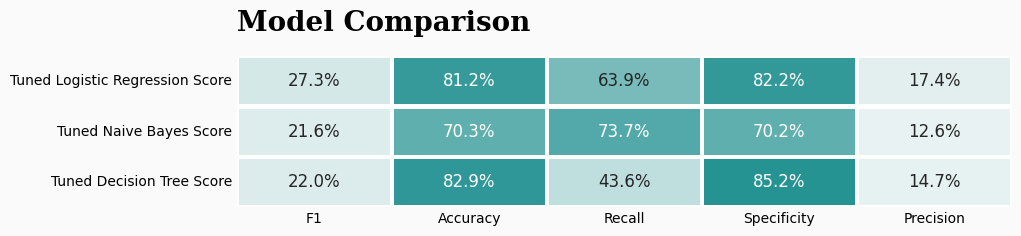

In [ ]:
df_models = round(pd.concat([logreg_df, navbayes_df, dectree_df], axis=1),3)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray)
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

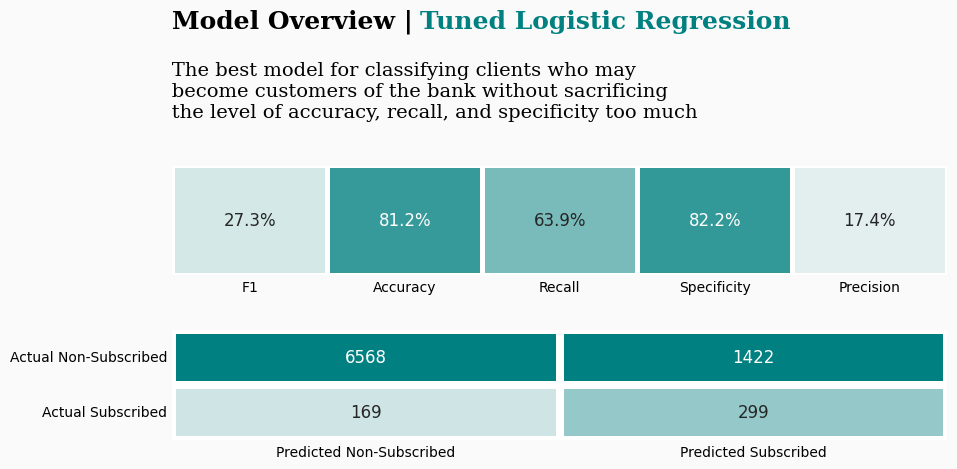

In [ ]:
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10,8), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,2, wspace=0.1, hspace=0.5)

# allignment
for ax in range(2):
    locals()['axis'+str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['axis'+str(ax)].set_facecolor(Colors.LightGray)
    locals()['axis'+str(ax)].tick_params(axis=u'both', which=u'both',length=0)


# plot
sns.heatmap(logreg_df.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95,yticklabels='', linewidths=2.5,cbar=False,ax=axis0,annot_kws={"fontsize":12})
sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=axis1,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],vmax=500,vmin=0,xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# text
axis0.text(0,-1.25,'Model Overview |',fontsize=18,fontweight='bold',fontfamily='serif')
axis0.text(1.6,-1.25,'Tuned Logistic Regression',fontsize=18,fontweight='bold',fontfamily='serif', color=Colors.Teal)
axis0.text(-0.45,-0.25,
           '''
           The best model for classifying clients who may
           become customers of the bank without sacrificing
           the level of accuracy, recall, and specificity too much
           '''
           ,fontsize=14,fontweight='normal',fontfamily='serif')

fig.show()